### <span style="color:#3c2f2f;font-size:1.5em; float:right; font-family:Times New Roman">KEYELA Patatchona, Нпммд-02-21</span>

# <span style="font-family:Times New Roman">Моделирование беспроводных сетей</span>
## <span style="font-family:Times New Roman"> Лабораторная работа № 2 </span>


## <span style="font-family:Times New Roman"> Задание 1 </span>
Сгенерировать выборку случайных чисел размером 100 и 1000 для двух распределений – экспоненциального и нормального. Для созданных выборок сделать следующее:
1. Посчитать выборочное среднее и дисперсию, сравнить с математическим
ожиданием соответствующих распределений;
2. Посчитать 0.5 и 0.99 квантили, сравнить с соответствующими теоретическими
значениями;
3. Построить гистограмму распределения;
4. Построить функцию распределения случайной величины на основе выборки (на
одном графике показать функции распределения, полученные из выборок
разного размера и теоретическую);
5. Построить плотность распределения случайной величины на основе выборки (на
одном графике показать плотности распределения, полученные из выборок
разного размера и теоретическую).
В итоге проанализировать зависимость точности аппроксимации от количества
экспериментов

In [32]:
# We import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from texttable import Texttable
from scipy.special import erf, erfinv

In [62]:
exp_data_100 = np.random.exponential(scale=1, size=100) # Here scale  = 1/lambda = 1
exp_data_1000 = np.random.exponential(scale=1, size=1000)

In [63]:
normal_data_100 = np.random.normal(loc=0.0, scale=1.0, size=100) # Mean = 0, deviation = 1
normal_data_1000 = np.random.normal(loc=0.0, scale=1.0, size=1000)

In [64]:
mean_exp_data_100 = np.mean(exp_data_100)
variance_exp_data_100 = np.var(exp_data_100)
mean_normal_data_100 = np.mean(normal_data_100)
variance_normal_data_100 = np.var(normal_data_100)

mean_exp_data_1000 = np.mean(exp_data_1000)
variance_exp_data_1000 = np.var(exp_data_1000)
mean_normal_data_1000 = np.mean(normal_data_1000)
variance_normal_data_1000 = np.var(normal_data_1000)

### Теоретические параматры: 
1. **Экспоненциальное распределение:** $\qquad \mu = \frac{1}{\lambda} = 1\quad$   и   $\quad \sigma^{2} = \frac{1}{\lambda^{2}} = 1 \quad$ $\quad Q(p) = -\frac{ln(1-p)}{\lambda}\quad$


2. **Нормальное распределение:** $\qquad \mu = 0 \quad$   и   $\quad \sigma^{2} = 1 \quad$ $\quad Q(p) = \mu + \sigma \sqrt{2}{erf}^{-1}(2p-1) \quad$

In [66]:
characteristics = [["Characteristics","Data set 100 elts", "Data set 1000 elts", "Theor. values"],
                  ["Mean Exp. dist.",mean_exp_data_100,mean_exp_data_1000,1.0],
                  ["Var. Exp. dist.",variance_exp_data_100,variance_exp_data_1000,1.0],
                  ["Mean normal dist.",mean_normal_data_100,mean_normal_data_1000,0.0],
                  ["Var. normal dist.",variance_normal_data_1000,variance_normal_data_1000,1.0]]

table = Texttable()
table.add_rows(characteristics)
print(table.draw())

+-------------------+-------------------+--------------------+---------------+
|  Characteristics  | Data set 100 elts | Data set 1000 elts | Theor. values |
+===================+===================+====================+===============+
| Mean Exp. dist.   | 1.058             | 0.981              | 1             |
+-------------------+-------------------+--------------------+---------------+
| Var. Exp. dist.   | 0.978             | 1.001              | 1             |
+-------------------+-------------------+--------------------+---------------+
| Mean normal dist. | -0.116            | -0.025             | 0             |
+-------------------+-------------------+--------------------+---------------+
| Var. normal dist. | 1.007             | 1.007              | 1             |
+-------------------+-------------------+--------------------+---------------+


In [138]:
# Теоретические квантили
exp_theoretical_quantile_05 = (-1)*1*np.log(1-0.5)
exp_theoretical_quantile_099 = (-1)*1*np.log(1-0.99)

normal_theoretical_quantile_05 = 0 + 1*np.sqrt(2)*erfinv(2*0.5 - 1)
normal_theoretical_quantile_099 = 0 + 1*np.sqrt(2)*erfinv(2*0.99 - 1)

In [139]:
# Выборочные квантили
exp_quantiles_100 = np.quantile(exp_data_100,[0.5,0.99])
exp_quantiles_1000 = np.quantile(exp_data_1000,[0.5,0.99])
normal_quantiles_100 = np.quantile(normal_data_100,[0.5,0.99])
normal_quantiles_1000 = np.quantile(normal_data_1000,[0.5,0.99])

In [140]:
# Сравнение квантилей
quantiles = [["Quantiles", "Data set 100 elts", "Data set 1000 elts", "Theoretical Q"],
            ["Exp. dist. p = 0.5",exp_quantiles_100[0],exp_quantiles_1000[0],exp_theoretical_quantile_05],
            ["Exp. dist. p = 0.99",exp_quantiles_100[1],exp_quantiles_1000[1],exp_theoretical_quantile_099],
            ["Norm. dist. p = 0.5",normal_quantiles_100[0],normal_quantiles_1000[0],normal_theoretical_quantile_05],
            ["Norm.dist. p = 0.99",normal_quantiles_100[1],normal_quantiles_1000[1],normal_theoretical_quantile_099]]

quantiles_table = Texttable()
quantiles_table.add_rows(quantiles)
print(quantiles_table.draw())

+---------------------+-------------------+--------------------+---------------+
|      Quantiles      | Data set 100 elts | Data set 1000 elts | Theoretical Q |
+=====================+===================+====================+===============+
| Exp. dist. p = 0.5  | 0.754             | 0.645              | 0.693         |
+---------------------+-------------------+--------------------+---------------+
| Exp. dist. p = 0.99 | 3.634             | 4.958              | 4.605         |
+---------------------+-------------------+--------------------+---------------+
| Norm. dist. p = 0.5 | -0.101            | -0.035             | 0             |
+---------------------+-------------------+--------------------+---------------+
| Norm.dist. p = 0.99 | 1.942             | 2.371              | 2.326         |
+---------------------+-------------------+--------------------+---------------+


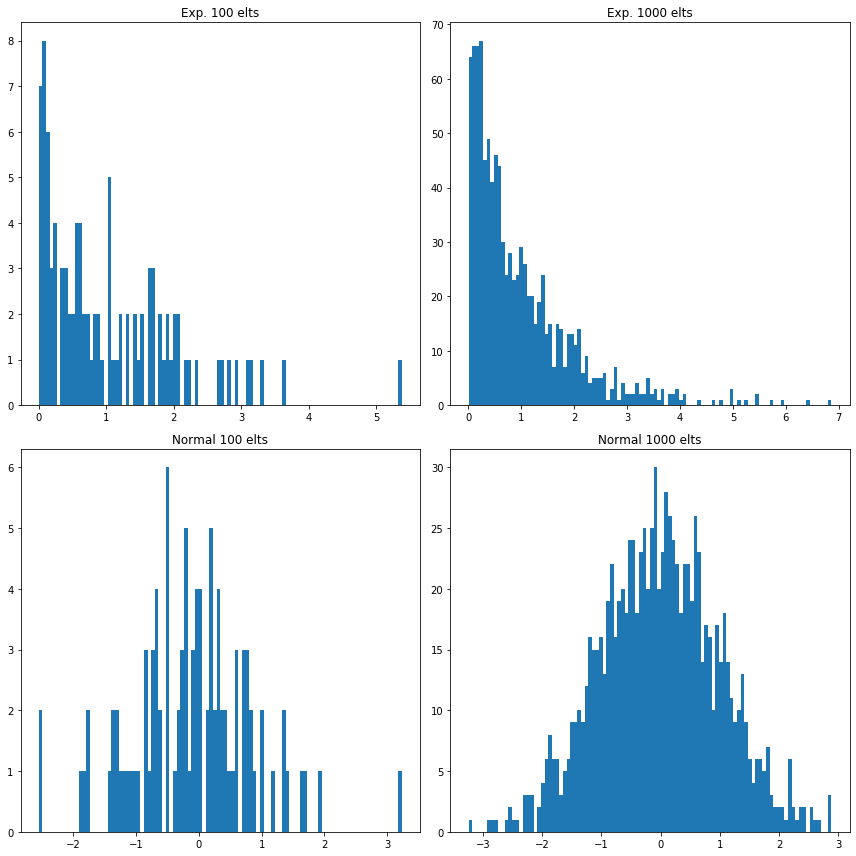

In [141]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0, 0].hist(exp_data_100,100)
axs[0, 0].set_title("Exp. 100 elts")

axs[1, 0].hist(normal_data_100,100)
axs[1, 0].set_title("Normal 100 elts")

axs[0, 1].hist(exp_data_1000,100)
axs[0, 1].set_title("Exp. 1000 elts")

axs[1, 1].hist(normal_data_1000,100)
axs[1, 1].set_title("Normal 1000 elts")
fig.tight_layout()

plt.savefig("histogramms.png")

### Задание 1.4

In [142]:
def exp_cdf(param_lambda, x): # Функция распределения экспоненциального распределенеия
    return 1 - np.exp(-1*param_lambda*x)

In [143]:
def normal_cdf(mu, sigma, x): # Функция распределения нормального распределенеия
       return 0.5*(1 + erf((x-mu)/(sigma*np.sqrt(2))))

In [144]:
exp_theoretical_x = np.linspace(0, 10, 100) 
exp_theoretical_y = exp_cdf( 1, exp_theoretical_x)
normal_theoretical_x = np.linspace(-5, 5, 100) 
normal_theoretical_y = normal_cdf(0,1, normal_theoretical_x)

In [145]:
exp_data_100_copied = np.copy(exp_data_100)
exp_data_1000_copied = np.copy(exp_data_1000)
normal_data_100_copied= np.copy(normal_data_100)
normal_data_1000_copied= np.copy(normal_data_1000)

In [146]:
exp_data_100_copied.sort()
exp_data_1000_copied.sort()
normal_data_100_copied.sort()
normal_data_1000_copied.sort()

In [147]:
exp_data_100_y = np.arange(0.,1.,0.01)
exp_data_1000_y = np.arange(0.,1.,0.001)
normal_data_100_y = np.arange(0.,1.,0.01)
normal_data_1000_y = np.arange(0.,1.,0.001)

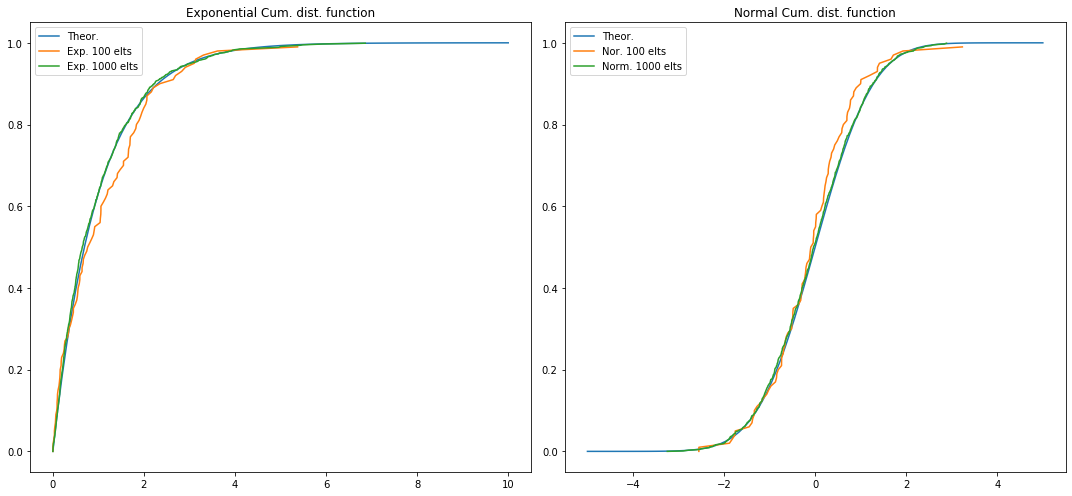

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(exp_theoretical_x,exp_theoretical_y,label="Theor.")
axs[0].plot(exp_data_100_copied,exp_data_100_y,label="Exp. 100 elts")
axs[0].plot(exp_data_1000_copied,exp_data_1000_y,label="Exp. 1000 elts")
axs[0].legend()
axs[0].set_title("Exponential Cum. dist. function")

axs[1].plot(normal_theoretical_x,normal_theoretical_y,label="Theor.")
axs[1].plot(normal_data_100_copied,normal_data_100_y,label="Nor. 100 elts")
axs[1].plot(normal_data_1000_copied,normal_data_1000_y,label="Norm. 1000 elts")
axs[1].legend()
axs[1].set_title("Normal Cum. dist. function")

fig.tight_layout()

### Задание 1.5

In [148]:
def exp_pdf(param_lambda, x): # плотность экспоненциального распределенеия
    return param_lambda * np.exp(-1*param_lambda*x)

In [149]:
def normal_pdf(mu, sigma, x):  # плотность нормального распределенеия
    return (np.exp(-0.5*((x-mu)/sigma)**2)) / (sigma*np.sqrt(2*np.pi))

In [150]:
exp_theor_density_y = exp_pdf(1,exp_theoretical_x)
nor_theor_density_y = normal_pdf(0,1,normal_theoretical_x)

In [151]:
exp_mean_100 = np.mean(exp_data_100_copied)
exp_mean_1000 = np.mean(exp_data_1000_copied)
nor_mean_100 = np.mean(normal_data_100_copied)
nor_mean_1000 = np.mean(normal_data_1000_copied)
nor_var_100 = np.var(normal_data_100_copied)
nor_var_1000 = np.var(normal_data_1000_copied)

In [152]:
exp_100_density_y = exp_pdf(1/exp_mean_100,exp_data_100_copied)
exp_1000_density_y = exp_pdf(1/exp_mean_1000,exp_data_1000_copied)

In [153]:
nor_100_density_y = normal_pdf(nor_mean_100,nor_var_100**0.5,normal_data_100_copied)
nor_1000_density_y = normal_pdf(nor_mean_1000,nor_var_100**0.5,normal_data_1000_copied)

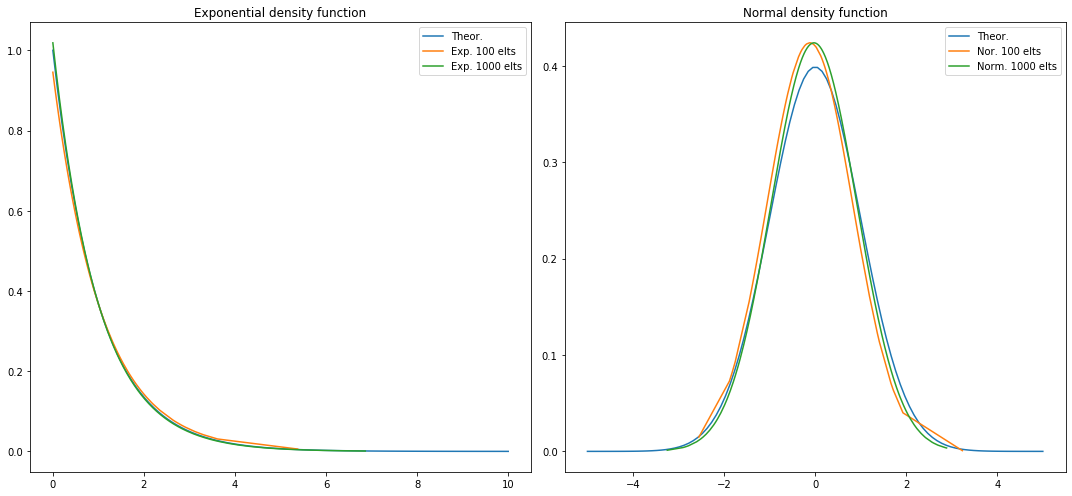

In [154]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(exp_theoretical_x,exp_theor_density_y,label="Theor.")
axs[0].plot(exp_data_100_copied,exp_100_density_y,label="Exp. 100 elts")
axs[0].plot(exp_data_1000_copied,exp_1000_density_y,label="Exp. 1000 elts")
axs[0].legend()
axs[0].set_title("Exponential density function")

axs[1].plot(normal_theoretical_x,nor_theor_density_y,label="Theor.")
axs[1].plot(normal_data_100_copied,nor_100_density_y,label="Nor. 100 elts")
axs[1].plot(normal_data_1000_copied,nor_1000_density_y,label="Norm. 1000 elts")
axs[1].legend()
axs[1].set_title("Normal density function")

fig.tight_layout()
plt.savefig("density.png")

## Задание №2. 
>Сгенерировать три выборки размера 100, 1000 и 10000 для случайных
расстояний между двумя точками, равномерно распределенные в прямоугольнике со
сторонами 10 и 30. Получить среднее значение расстояния между точками, построить
функцию распределения вероятностей и плотности вероятностей случайных
расстояний. Показать разницу между соответствующими функциями на одном
графике.

In [155]:
import pandas as pd

In [156]:
# это рассчет расстояния между точками
def distance(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

In [157]:
# генерация выборки расстояния между точками на основе параметра количества точек
def distance_line(number):
    a = 10
    b = 30
    distances = []
    for i in range(number):
        x1 = np.random.uniform(0, a)
        y1 = np.random.uniform(0, b)
        x2 = np.random.uniform(0, a)
        y2 = np.random.uniform(0, b)
        distances.append(distance(x1, y1, x2, y2))
    distances.sort()
    return distances

In [158]:
distances_100 = distance_line(100)
distances_1000 = distance_line(1000)
distances_10000 = distance_line(10000)

In [159]:
print('Average distance(100 точек) = ',np.average(distances_100))
print('Average distance (1000 точек) = ',np.average(distances_1000))
print('Average distance (10000 точек) = ',np.average(distances_10000))

Average distance(100 точек) =  10.414608146635075
Average distance (1000 точек) =  11.374489101438625
Average distance (10000 точек) =  11.153744415017583


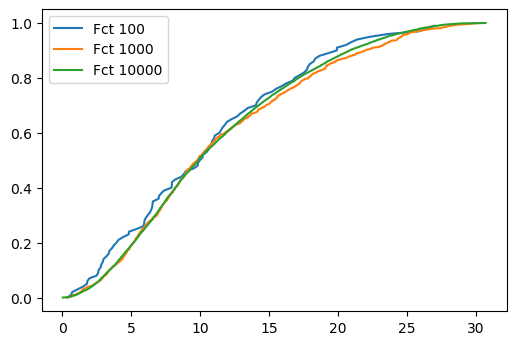

In [160]:
distances_100_copy = np.copy(distances_100)
distances_1000_copy = np.copy(distances_1000)
distances_10000_copy = np.copy(distances_10000)

distances_100_copy_y = np.arange(0.,1.,0.01)
distances_1000_copy_y = np.arange(0.,1.,0.001)
distances_10000_copy_y = np.arange(0.,1.,0.0001)

distances_100_copy_y_1 = pd.Series(distances_100_copy)
distances_1000_copy_y_1 = pd.Series(distances_1000_copy)
distances_10000_copy_y_1 = pd.Series(distances_10000_copy)

plt.figure(dpi=100)
plt.plot(distances_100_copy, distances_100_copy_y, label='Fct 100')
plt.plot(distances_1000_copy, distances_1000_copy_y, label='Fct 1000')
plt.plot(distances_10000_copy, distances_10000_copy_y, label='Fct 10000')
plt.legend()
plt.show()

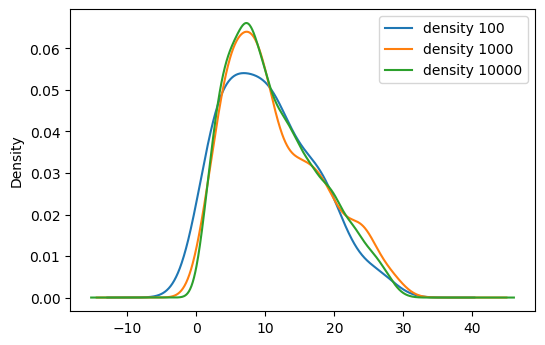

In [161]:
plt.figure(dpi=100)
distances_100_copy_y_1.plot.kde(label='density 100')
distances_1000_copy_y_1.plot.kde(label='density 1000')
distances_10000_copy_y_1.plot.kde(label='density 10000')
plt.legend()
plt.show()

# Вывод
 В этой лабораторной работе выпонил следующие задачи:


Сгенерировал выборку случайных чисел размером 100 и 1000 для двух
распределений – экспоненциального и нормального. Для созданных выборок сделал
следующее:
1. Посчитал выборочное среднее и дисперсию, сравнить с математическим
ожиданием соответствующих распределений;
2. Посчитал 0.5 и 0.99 квантили, сравнить с соответствующими теоретическими
значениями;
3. Построил гистограмму распределения;
4. Построил функцию распределения случайной величины на основе выборки (на
одном графике показать функции распределения, полученные из выборок
разного размера и теоретическую);
5. Построил плотность распределения случайной величины на основе выборки (на
одном графике показать плотности распределения, полученные из выборок
разного размера и теоретическую).


Сгенерировал три выборки размера 100, 1000 и 10000 для случайных
расстояний между двумя точками, равномерно распределенные в прямоугольнике со
сторонами 10 и 30. Получить среднее значение расстояния между точками, построил
функцию распределения вероятностей и плотности вероятностей случайных
расстояний. Показал разницу между соответствующими функциями на одном
графике.